In [1]:
# import statements
%load_ext autoreload
%autoreload 2
%cd "../../"

import torch 
from torch.autograd import Variable 
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    

import numpy as np
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import pickle
from scipy.cluster.vq import kmeans2
import scipy.stats as ss
from scipy.io import loadmat

/m/home/home5/56/kapoorj1/unix/repos/bayesian-ode


In [97]:

# def closure():
#     return 0.5*(0.1*x*x + (y+0.5*x*x)**2)

# def prob(x, y):
#     return np.exp(-0.5*(0.1*x*x + (y+ 0.5*x*x)**2))

def closure(add_prior=True):
    return 0.5*(0.1*(x-2)**2 + 6*(y-4)**2)

def prob(x, y):
    return 0.5*(0.1*(x-2)**2 + 6*(y-4)**2)

def plot_contours():
#     X = np.linspace(-10, 10, 300)
#     Y = np.linspace(-12, 4, 1000)
    X = np.linspace(-3, 7, 300)
    Y = np.linspace(-1, 8, 1000)

    X, Y = np.meshgrid(X, Y)

    Z = prob(X, Y)
    plt.contour(X, Y, Z)

In [87]:
from samplers.metrics import *

x = torch.nn.Parameter(torch.randn([1]))
y = torch.nn.Parameter(torch.randn([1]))

params = [x, y]

def hess_closure():
    hess = eval_full_hessian(torch.autograd.grad(closure(), params, create_graph=True), params)
#     plt.figure()
#     plt.imshow(hess.clone().detach().numpy())
#     plt.colorbar()
    return hess

# metric = SoftAbsMetric(closure=hess_closure, softabs_coeff=10)
metric = HessianMetric(closure=hess_closure)
# metric = IdentityMetric(size=l)

In [88]:
from samplers import MALA, MMALA, pSGLD

# sampler = MALA(params, lr=1e-4, add_noise=True)
# # sampler = MMALA(params, metric_obj=metric, lr=1e-2)


# # x.data = torch.randn([1])
# # y.data = torch.randn([1])

# chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=1000)

sampler = pSGLD(params, lr0=0.1, lr_gamma=0.51, lr_t0=10, lr_alpha=0.1, lambda_=1e-5, alpha=0.95)


chain, logp_array = sampler.sample(closure, burn_in=2000, num_samples=10000, print_loss=True, clipping=False)


<class 'dict'>
Burn-in phase started
Burn-in iter 0001 | loss 120.927155
Burn-in iter 0002 | loss 116.610176
Burn-in iter 0003 | loss 109.785225
Burn-in iter 0004 | loss 110.089813
Burn-in iter 0005 | loss 105.296875
Burn-in iter 0006 | loss 103.756729
Burn-in iter 0007 | loss 103.036873
Burn-in iter 0008 | loss 100.381737
Burn-in iter 0009 | loss 98.093437
Burn-in iter 0010 | loss 97.010338
Burn-in iter 0011 | loss 92.685265
Burn-in iter 0012 | loss 92.120468
Burn-in iter 0013 | loss 91.094154
Burn-in iter 0014 | loss 89.215065
Burn-in iter 0015 | loss 87.285172
Burn-in iter 0016 | loss 88.045715
Burn-in iter 0017 | loss 88.211494
Burn-in iter 0018 | loss 88.495918
Burn-in iter 0019 | loss 85.305809
Burn-in iter 0020 | loss 82.704620
Burn-in iter 0021 | loss 81.935883
Burn-in iter 0022 | loss 81.365089
Burn-in iter 0023 | loss 78.687126
Burn-in iter 0024 | loss 77.061378
Burn-in iter 0025 | loss 75.686531
Burn-in iter 0026 | loss 75.910698
Burn-in iter 0027 | loss 73.956429
Burn-in it

Burn-in iter 0368 | loss 4.081786
Burn-in iter 0369 | loss 3.745229
Burn-in iter 0370 | loss 3.336112
Burn-in iter 0371 | loss 3.481323
Burn-in iter 0372 | loss 3.477387
Burn-in iter 0373 | loss 4.128850
Burn-in iter 0374 | loss 4.918007
Burn-in iter 0375 | loss 5.239581
Burn-in iter 0376 | loss 5.732455
Burn-in iter 0377 | loss 5.855723
Burn-in iter 0378 | loss 5.800694
Burn-in iter 0379 | loss 5.659313
Burn-in iter 0380 | loss 6.630792
Burn-in iter 0381 | loss 6.552890
Burn-in iter 0382 | loss 5.894804
Burn-in iter 0383 | loss 5.843130
Burn-in iter 0384 | loss 4.953377
Burn-in iter 0385 | loss 4.846554
Burn-in iter 0386 | loss 5.094510
Burn-in iter 0387 | loss 4.908067
Burn-in iter 0388 | loss 4.800435
Burn-in iter 0389 | loss 4.498082
Burn-in iter 0390 | loss 4.569165
Burn-in iter 0391 | loss 4.084170
Burn-in iter 0392 | loss 4.194386
Burn-in iter 0393 | loss 3.901334
Burn-in iter 0394 | loss 3.115620
Burn-in iter 0395 | loss 2.842340
Burn-in iter 0396 | loss 2.595308
Burn-in iter 0

Burn-in iter 0728 | loss 2.811945
Burn-in iter 0729 | loss 2.859331
Burn-in iter 0730 | loss 2.730954
Burn-in iter 0731 | loss 2.721334
Burn-in iter 0732 | loss 2.840085
Burn-in iter 0733 | loss 2.621474
Burn-in iter 0734 | loss 2.852871
Burn-in iter 0735 | loss 2.526203
Burn-in iter 0736 | loss 2.490782
Burn-in iter 0737 | loss 2.496270
Burn-in iter 0738 | loss 2.545312
Burn-in iter 0739 | loss 2.308847
Burn-in iter 0740 | loss 2.198643
Burn-in iter 0741 | loss 2.126841
Burn-in iter 0742 | loss 2.130307
Burn-in iter 0743 | loss 2.360091
Burn-in iter 0744 | loss 2.066398
Burn-in iter 0745 | loss 2.128790
Burn-in iter 0746 | loss 2.236760
Burn-in iter 0747 | loss 2.228610
Burn-in iter 0748 | loss 2.359321
Burn-in iter 0749 | loss 2.211247
Burn-in iter 0750 | loss 2.408781
Burn-in iter 0751 | loss 2.373002
Burn-in iter 0752 | loss 2.736867
Burn-in iter 0753 | loss 2.706538
Burn-in iter 0754 | loss 2.799963
Burn-in iter 0755 | loss 2.373704
Burn-in iter 0756 | loss 2.477406
Burn-in iter 0

Burn-in iter 1089 | loss 0.593092
Burn-in iter 1090 | loss 0.656990
Burn-in iter 1091 | loss 0.627158
Burn-in iter 1092 | loss 0.579948
Burn-in iter 1093 | loss 0.537153
Burn-in iter 1094 | loss 0.642208
Burn-in iter 1095 | loss 0.788678
Burn-in iter 1096 | loss 0.856036
Burn-in iter 1097 | loss 0.910165
Burn-in iter 1098 | loss 0.948201
Burn-in iter 1099 | loss 0.794643
Burn-in iter 1100 | loss 0.742705
Burn-in iter 1101 | loss 0.715235
Burn-in iter 1102 | loss 0.656268
Burn-in iter 1103 | loss 0.722116
Burn-in iter 1104 | loss 0.733464
Burn-in iter 1105 | loss 0.585173
Burn-in iter 1106 | loss 0.687371
Burn-in iter 1107 | loss 0.674587
Burn-in iter 1108 | loss 0.600414
Burn-in iter 1109 | loss 0.470126
Burn-in iter 1110 | loss 0.459820
Burn-in iter 1111 | loss 0.605623
Burn-in iter 1112 | loss 0.554997
Burn-in iter 1113 | loss 0.494002
Burn-in iter 1114 | loss 0.373218
Burn-in iter 1115 | loss 0.610300
Burn-in iter 1116 | loss 0.429516
Burn-in iter 1117 | loss 0.307323
Burn-in iter 1

Burn-in iter 1463 | loss 0.243068
Burn-in iter 1464 | loss 0.159189
Burn-in iter 1465 | loss 0.036167
Burn-in iter 1466 | loss 0.020501
Burn-in iter 1467 | loss 0.034943
Burn-in iter 1468 | loss 0.070919
Burn-in iter 1469 | loss 0.111678
Burn-in iter 1470 | loss 0.081689
Burn-in iter 1471 | loss 0.041256
Burn-in iter 1472 | loss 0.048909
Burn-in iter 1473 | loss 0.080356
Burn-in iter 1474 | loss 0.029326
Burn-in iter 1475 | loss 0.051858
Burn-in iter 1476 | loss 0.185226
Burn-in iter 1477 | loss 0.088329
Burn-in iter 1478 | loss 0.046680
Burn-in iter 1479 | loss 0.081488
Burn-in iter 1480 | loss 0.161588
Burn-in iter 1481 | loss 0.648428
Burn-in iter 1482 | loss 0.624333
Burn-in iter 1483 | loss 1.178308
Burn-in iter 1484 | loss 1.473416
Burn-in iter 1485 | loss 1.416598
Burn-in iter 1486 | loss 1.704167
Burn-in iter 1487 | loss 1.315657
Burn-in iter 1488 | loss 1.466823
Burn-in iter 1489 | loss 1.376699
Burn-in iter 1490 | loss 1.417010
Burn-in iter 1491 | loss 1.353570
Burn-in iter 1

Burn-in iter 1837 | loss 4.689907
Burn-in iter 1838 | loss 5.012941
Burn-in iter 1839 | loss 5.377953
Burn-in iter 1840 | loss 5.493827
Burn-in iter 1841 | loss 5.474535
Burn-in iter 1842 | loss 5.138918
Burn-in iter 1843 | loss 5.202950
Burn-in iter 1844 | loss 5.502682
Burn-in iter 1845 | loss 5.822758
Burn-in iter 1846 | loss 5.079007
Burn-in iter 1847 | loss 4.401186
Burn-in iter 1848 | loss 4.471883
Burn-in iter 1849 | loss 4.493306
Burn-in iter 1850 | loss 4.364547
Burn-in iter 1851 | loss 4.990954
Burn-in iter 1852 | loss 4.892166
Burn-in iter 1853 | loss 4.987580
Burn-in iter 1854 | loss 4.788827
Burn-in iter 1855 | loss 5.022950
Burn-in iter 1856 | loss 5.098713
Burn-in iter 1857 | loss 5.204508
Burn-in iter 1858 | loss 4.611871
Burn-in iter 1859 | loss 4.241690
Burn-in iter 1860 | loss 4.298286
Burn-in iter 1861 | loss 4.035070
Burn-in iter 1862 | loss 3.565383
Burn-in iter 1863 | loss 3.530162
Burn-in iter 1864 | loss 3.113413
Burn-in iter 1865 | loss 3.091970
Burn-in iter 1

Sample iter 0189 | loss 3.310412
Sample iter 0190 | loss 3.286213
Sample iter 0191 | loss 3.553789
Sample iter 0192 | loss 3.232574
Sample iter 0193 | loss 3.133024
Sample iter 0194 | loss 3.101054
Sample iter 0195 | loss 3.556401
Sample iter 0196 | loss 3.285751
Sample iter 0197 | loss 3.126770
Sample iter 0198 | loss 2.908044
Sample iter 0199 | loss 3.138948
Sample iter 0200 | loss 2.888450
Sample iter 0201 | loss 2.665110
Sample iter 0202 | loss 2.679859
Sample iter 0203 | loss 2.782753
Sample iter 0204 | loss 2.893006
Sample iter 0205 | loss 2.722582
Sample iter 0206 | loss 2.703495
Sample iter 0207 | loss 2.821291
Sample iter 0208 | loss 2.870986
Sample iter 0209 | loss 3.004096
Sample iter 0210 | loss 3.285466
Sample iter 0211 | loss 3.512198
Sample iter 0212 | loss 3.418697
Sample iter 0213 | loss 2.856039
Sample iter 0214 | loss 3.194254
Sample iter 0215 | loss 2.974555
Sample iter 0216 | loss 2.717141
Sample iter 0217 | loss 2.642477
Sample iter 0218 | loss 2.684956
Sample ite

Sample iter 0539 | loss 4.710231
Sample iter 0540 | loss 4.945791
Sample iter 0541 | loss 4.512817
Sample iter 0542 | loss 4.693101
Sample iter 0543 | loss 5.094932
Sample iter 0544 | loss 5.293216
Sample iter 0545 | loss 5.150501
Sample iter 0546 | loss 4.642857
Sample iter 0547 | loss 5.010315
Sample iter 0548 | loss 5.139340
Sample iter 0549 | loss 5.274339
Sample iter 0550 | loss 4.935391
Sample iter 0551 | loss 4.645271
Sample iter 0552 | loss 4.448103
Sample iter 0553 | loss 4.254241
Sample iter 0554 | loss 4.142949
Sample iter 0555 | loss 4.039721
Sample iter 0556 | loss 4.021116
Sample iter 0557 | loss 3.694706
Sample iter 0558 | loss 3.738876
Sample iter 0559 | loss 3.517275
Sample iter 0560 | loss 3.504078
Sample iter 0561 | loss 3.598583
Sample iter 0562 | loss 3.290472
Sample iter 0563 | loss 3.145636
Sample iter 0564 | loss 3.297087
Sample iter 0565 | loss 3.078229
Sample iter 0566 | loss 3.104266
Sample iter 0567 | loss 3.104453
Sample iter 0568 | loss 3.276416
Sample ite

Sample iter 0884 | loss 2.123395
Sample iter 0885 | loss 1.869121
Sample iter 0886 | loss 1.639782
Sample iter 0887 | loss 1.555035
Sample iter 0888 | loss 1.515340
Sample iter 0889 | loss 1.999010
Sample iter 0890 | loss 2.054842
Sample iter 0891 | loss 2.403871
Sample iter 0892 | loss 2.276358
Sample iter 0893 | loss 2.340775
Sample iter 0894 | loss 2.111298
Sample iter 0895 | loss 1.743803
Sample iter 0896 | loss 1.850938
Sample iter 0897 | loss 1.958295
Sample iter 0898 | loss 2.102460
Sample iter 0899 | loss 1.927825
Sample iter 0900 | loss 1.762168
Sample iter 0901 | loss 1.773681
Sample iter 0902 | loss 1.676971
Sample iter 0903 | loss 1.432824
Sample iter 0904 | loss 1.518400
Sample iter 0905 | loss 1.442327
Sample iter 0906 | loss 1.436909
Sample iter 0907 | loss 1.347219
Sample iter 0908 | loss 1.118295
Sample iter 0909 | loss 1.087945
Sample iter 0910 | loss 1.077106
Sample iter 0911 | loss 1.091379
Sample iter 0912 | loss 1.110882
Sample iter 0913 | loss 1.156479
Sample ite

Sample iter 1242 | loss 4.762812
Sample iter 1243 | loss 5.166188
Sample iter 1244 | loss 5.125908
Sample iter 1245 | loss 4.626107
Sample iter 1246 | loss 4.454113
Sample iter 1247 | loss 4.081604
Sample iter 1248 | loss 4.290388
Sample iter 1249 | loss 4.501425
Sample iter 1250 | loss 4.319084
Sample iter 1251 | loss 4.154959
Sample iter 1252 | loss 4.029621
Sample iter 1253 | loss 3.241260
Sample iter 1254 | loss 3.083083
Sample iter 1255 | loss 3.066986
Sample iter 1256 | loss 3.116625
Sample iter 1257 | loss 3.266239
Sample iter 1258 | loss 3.296085
Sample iter 1259 | loss 3.263186
Sample iter 1260 | loss 3.326628
Sample iter 1261 | loss 3.135623
Sample iter 1262 | loss 3.079585
Sample iter 1263 | loss 2.861076
Sample iter 1264 | loss 2.999633
Sample iter 1265 | loss 2.789480
Sample iter 1266 | loss 2.858196
Sample iter 1267 | loss 2.796925
Sample iter 1268 | loss 2.709502
Sample iter 1269 | loss 2.714131
Sample iter 1270 | loss 2.472363
Sample iter 1271 | loss 2.143447
Sample ite

Sample iter 1591 | loss 2.357628
Sample iter 1592 | loss 2.156983
Sample iter 1593 | loss 2.016369
Sample iter 1594 | loss 2.115453
Sample iter 1595 | loss 2.551061
Sample iter 1596 | loss 2.251377
Sample iter 1597 | loss 1.951119
Sample iter 1598 | loss 1.828585
Sample iter 1599 | loss 1.869969
Sample iter 1600 | loss 2.009841
Sample iter 1601 | loss 1.961224
Sample iter 1602 | loss 1.832329
Sample iter 1603 | loss 1.807787
Sample iter 1604 | loss 1.662574
Sample iter 1605 | loss 1.833048
Sample iter 1606 | loss 1.738001
Sample iter 1607 | loss 1.708699
Sample iter 1608 | loss 1.624679
Sample iter 1609 | loss 1.556837
Sample iter 1610 | loss 1.660800
Sample iter 1611 | loss 1.694748
Sample iter 1612 | loss 1.949884
Sample iter 1613 | loss 1.704825
Sample iter 1614 | loss 1.855556
Sample iter 1615 | loss 1.750485
Sample iter 1616 | loss 1.635544
Sample iter 1617 | loss 1.452560
Sample iter 1618 | loss 1.503690
Sample iter 1619 | loss 1.525748
Sample iter 1620 | loss 1.485303
Sample ite

Sample iter 1942 | loss 0.159347
Sample iter 1943 | loss 0.122919
Sample iter 1944 | loss 0.281024
Sample iter 1945 | loss 0.270303
Sample iter 1946 | loss 0.290327
Sample iter 1947 | loss 0.339794
Sample iter 1948 | loss 0.205241
Sample iter 1949 | loss 0.207515
Sample iter 1950 | loss 0.308959
Sample iter 1951 | loss 0.482491
Sample iter 1952 | loss 0.557651
Sample iter 1953 | loss 0.489651
Sample iter 1954 | loss 0.399732
Sample iter 1955 | loss 0.311079
Sample iter 1956 | loss 0.329402
Sample iter 1957 | loss 0.262845
Sample iter 1958 | loss 0.323232
Sample iter 1959 | loss 0.277323
Sample iter 1960 | loss 0.293787
Sample iter 1961 | loss 0.399984
Sample iter 1962 | loss 0.637085
Sample iter 1963 | loss 0.909545
Sample iter 1964 | loss 0.786107
Sample iter 1965 | loss 0.751507
Sample iter 1966 | loss 0.704616
Sample iter 1967 | loss 0.746050
Sample iter 1968 | loss 0.613530
Sample iter 1969 | loss 0.560789
Sample iter 1970 | loss 0.526548
Sample iter 1971 | loss 0.424698
Sample ite

Sample iter 2227 | loss 2.335252
Sample iter 2228 | loss 2.498730
Sample iter 2229 | loss 2.566355
Sample iter 2230 | loss 2.699043
Sample iter 2231 | loss 2.310616
Sample iter 2232 | loss 2.543791
Sample iter 2233 | loss 2.366133
Sample iter 2234 | loss 2.242785
Sample iter 2235 | loss 2.112336
Sample iter 2236 | loss 1.954852
Sample iter 2237 | loss 1.726854
Sample iter 2238 | loss 1.945342
Sample iter 2239 | loss 1.788666
Sample iter 2240 | loss 1.936104
Sample iter 2241 | loss 2.231141
Sample iter 2242 | loss 2.349015
Sample iter 2243 | loss 2.372723
Sample iter 2244 | loss 2.750587
Sample iter 2245 | loss 3.026562
Sample iter 2246 | loss 2.461990
Sample iter 2247 | loss 2.283692
Sample iter 2248 | loss 2.321293
Sample iter 2249 | loss 2.127334
Sample iter 2250 | loss 2.500108
Sample iter 2251 | loss 2.542541
Sample iter 2252 | loss 2.183317
Sample iter 2253 | loss 2.180667
Sample iter 2254 | loss 2.208706
Sample iter 2255 | loss 2.281253
Sample iter 2256 | loss 2.534149
Sample ite

Sample iter 2525 | loss 3.248710
Sample iter 2526 | loss 2.861241
Sample iter 2527 | loss 3.145233
Sample iter 2528 | loss 2.779967
Sample iter 2529 | loss 3.208420
Sample iter 2530 | loss 2.852489
Sample iter 2531 | loss 2.632436
Sample iter 2532 | loss 2.409544
Sample iter 2533 | loss 2.280936
Sample iter 2534 | loss 2.236810
Sample iter 2535 | loss 1.977462
Sample iter 2536 | loss 1.772345
Sample iter 2537 | loss 1.563819
Sample iter 2538 | loss 1.641966
Sample iter 2539 | loss 1.667143
Sample iter 2540 | loss 1.646907
Sample iter 2541 | loss 1.614956
Sample iter 2542 | loss 1.408974
Sample iter 2543 | loss 1.599346
Sample iter 2544 | loss 1.470172
Sample iter 2545 | loss 1.586685
Sample iter 2546 | loss 1.731216
Sample iter 2547 | loss 1.518791
Sample iter 2548 | loss 1.519806
Sample iter 2549 | loss 1.428432
Sample iter 2550 | loss 1.467152
Sample iter 2551 | loss 1.584004
Sample iter 2552 | loss 1.210982
Sample iter 2553 | loss 1.209288
Sample iter 2554 | loss 1.279251
Sample ite

Sample iter 2796 | loss 0.470245
Sample iter 2797 | loss 0.358248
Sample iter 2798 | loss 0.461815
Sample iter 2799 | loss 0.417240
Sample iter 2800 | loss 0.515227
Sample iter 2801 | loss 0.411348
Sample iter 2802 | loss 0.502983
Sample iter 2803 | loss 0.615940
Sample iter 2804 | loss 0.577844
Sample iter 2805 | loss 0.475955
Sample iter 2806 | loss 0.355267
Sample iter 2807 | loss 0.313291
Sample iter 2808 | loss 0.254711
Sample iter 2809 | loss 0.207044
Sample iter 2810 | loss 0.249091
Sample iter 2811 | loss 0.188048
Sample iter 2812 | loss 0.208405
Sample iter 2813 | loss 0.271273
Sample iter 2814 | loss 0.188334
Sample iter 2815 | loss 0.153577
Sample iter 2816 | loss 0.189039
Sample iter 2817 | loss 0.241780
Sample iter 2818 | loss 0.171605
Sample iter 2819 | loss 0.099058
Sample iter 2820 | loss 0.133782
Sample iter 2821 | loss 0.075992
Sample iter 2822 | loss 0.123691
Sample iter 2823 | loss 0.135090
Sample iter 2824 | loss 0.150771
Sample iter 2825 | loss 0.150781
Sample ite

Sample iter 3091 | loss 2.451782
Sample iter 3092 | loss 2.278078
Sample iter 3093 | loss 2.446928
Sample iter 3094 | loss 2.293468
Sample iter 3095 | loss 1.963748
Sample iter 3096 | loss 2.089712
Sample iter 3097 | loss 2.185894
Sample iter 3098 | loss 2.002599
Sample iter 3099 | loss 1.857291
Sample iter 3100 | loss 1.903799
Sample iter 3101 | loss 1.808650
Sample iter 3102 | loss 1.797386
Sample iter 3103 | loss 1.864924
Sample iter 3104 | loss 1.732292
Sample iter 3105 | loss 1.439822
Sample iter 3106 | loss 1.478710
Sample iter 3107 | loss 1.389247
Sample iter 3108 | loss 1.543708
Sample iter 3109 | loss 1.401823
Sample iter 3110 | loss 1.344788
Sample iter 3111 | loss 1.169640
Sample iter 3112 | loss 1.465459
Sample iter 3113 | loss 1.486608
Sample iter 3114 | loss 1.202979
Sample iter 3115 | loss 1.109094
Sample iter 3116 | loss 1.137766
Sample iter 3117 | loss 1.055024
Sample iter 3118 | loss 1.194396
Sample iter 3119 | loss 1.634419
Sample iter 3120 | loss 1.543389
Sample ite

Sample iter 3422 | loss 4.062959
Sample iter 3423 | loss 3.985593
Sample iter 3424 | loss 3.938458
Sample iter 3425 | loss 4.147525
Sample iter 3426 | loss 4.184216
Sample iter 3427 | loss 4.236332
Sample iter 3428 | loss 4.009799
Sample iter 3429 | loss 4.338992
Sample iter 3430 | loss 4.300245
Sample iter 3431 | loss 4.154756
Sample iter 3432 | loss 4.162485
Sample iter 3433 | loss 4.184887
Sample iter 3434 | loss 4.165053
Sample iter 3435 | loss 4.070590
Sample iter 3436 | loss 4.644090
Sample iter 3437 | loss 4.528563
Sample iter 3438 | loss 4.157997
Sample iter 3439 | loss 4.242299
Sample iter 3440 | loss 4.396715
Sample iter 3441 | loss 4.603700
Sample iter 3442 | loss 4.715122
Sample iter 3443 | loss 4.596145
Sample iter 3444 | loss 4.952400
Sample iter 3445 | loss 5.078149
Sample iter 3446 | loss 5.527464
Sample iter 3447 | loss 5.861660
Sample iter 3448 | loss 5.662938
Sample iter 3449 | loss 5.313011
Sample iter 3450 | loss 5.428359
Sample iter 3451 | loss 5.342453
Sample ite

Sample iter 3770 | loss 3.034801
Sample iter 3771 | loss 2.917707
Sample iter 3772 | loss 2.698283
Sample iter 3773 | loss 2.775267
Sample iter 3774 | loss 2.439470
Sample iter 3775 | loss 2.699945
Sample iter 3776 | loss 2.609535
Sample iter 3777 | loss 2.804774
Sample iter 3778 | loss 2.937917
Sample iter 3779 | loss 2.673938
Sample iter 3780 | loss 2.837943
Sample iter 3781 | loss 2.705373
Sample iter 3782 | loss 2.722752
Sample iter 3783 | loss 2.597888
Sample iter 3784 | loss 2.352752
Sample iter 3785 | loss 2.323211
Sample iter 3786 | loss 2.223606
Sample iter 3787 | loss 2.107243
Sample iter 3788 | loss 2.346831
Sample iter 3789 | loss 2.272937
Sample iter 3790 | loss 2.330844
Sample iter 3791 | loss 2.098855
Sample iter 3792 | loss 2.121178
Sample iter 3793 | loss 2.598403
Sample iter 3794 | loss 2.656054
Sample iter 3795 | loss 2.570079
Sample iter 3796 | loss 2.611988
Sample iter 3797 | loss 2.688937
Sample iter 3798 | loss 2.673713
Sample iter 3799 | loss 2.640814
Sample ite

Sample iter 4135 | loss 0.948869
Sample iter 4136 | loss 0.873066
Sample iter 4137 | loss 0.955199
Sample iter 4138 | loss 1.047204
Sample iter 4139 | loss 1.019202
Sample iter 4140 | loss 0.985750
Sample iter 4141 | loss 1.010102
Sample iter 4142 | loss 1.058840
Sample iter 4143 | loss 1.195801
Sample iter 4144 | loss 1.172152
Sample iter 4145 | loss 1.304716
Sample iter 4146 | loss 1.397384
Sample iter 4147 | loss 1.454338
Sample iter 4148 | loss 1.416971
Sample iter 4149 | loss 1.331225
Sample iter 4150 | loss 1.350489
Sample iter 4151 | loss 1.464818
Sample iter 4152 | loss 1.433274
Sample iter 4153 | loss 1.407120
Sample iter 4154 | loss 1.275071
Sample iter 4155 | loss 1.221782
Sample iter 4156 | loss 1.313403
Sample iter 4157 | loss 1.258489
Sample iter 4158 | loss 1.377423
Sample iter 4159 | loss 1.479984
Sample iter 4160 | loss 1.255078
Sample iter 4161 | loss 1.282115
Sample iter 4162 | loss 1.147959
Sample iter 4163 | loss 1.148248
Sample iter 4164 | loss 1.103346
Sample ite

Sample iter 4485 | loss 0.608772
Sample iter 4486 | loss 0.604201
Sample iter 4487 | loss 0.736902
Sample iter 4488 | loss 0.845655
Sample iter 4489 | loss 0.899648
Sample iter 4490 | loss 1.039006
Sample iter 4491 | loss 0.908714
Sample iter 4492 | loss 1.173000
Sample iter 4493 | loss 1.229184
Sample iter 4494 | loss 1.244814
Sample iter 4495 | loss 1.015211
Sample iter 4496 | loss 0.865906
Sample iter 4497 | loss 0.802725
Sample iter 4498 | loss 0.760196
Sample iter 4499 | loss 0.772050
Sample iter 4500 | loss 0.711803
Sample iter 4501 | loss 0.666996
Sample iter 4502 | loss 0.691778
Sample iter 4503 | loss 0.573724
Sample iter 4504 | loss 0.525978
Sample iter 4505 | loss 0.599666
Sample iter 4506 | loss 0.517358
Sample iter 4507 | loss 0.490779
Sample iter 4508 | loss 0.574436
Sample iter 4509 | loss 0.727078
Sample iter 4510 | loss 0.596202
Sample iter 4511 | loss 0.689147
Sample iter 4512 | loss 0.574520
Sample iter 4513 | loss 0.642644
Sample iter 4514 | loss 0.718427
Sample ite

Sample iter 4854 | loss 2.161991
Sample iter 4855 | loss 2.416754
Sample iter 4856 | loss 2.346018
Sample iter 4857 | loss 2.361572
Sample iter 4858 | loss 1.963195
Sample iter 4859 | loss 2.027706
Sample iter 4860 | loss 1.784539
Sample iter 4861 | loss 2.182721
Sample iter 4862 | loss 2.150966
Sample iter 4863 | loss 2.118920
Sample iter 4864 | loss 2.057100
Sample iter 4865 | loss 1.965353
Sample iter 4866 | loss 1.788687
Sample iter 4867 | loss 1.705106
Sample iter 4868 | loss 1.668171
Sample iter 4869 | loss 1.549408
Sample iter 4870 | loss 1.821604
Sample iter 4871 | loss 1.904505
Sample iter 4872 | loss 1.991986
Sample iter 4873 | loss 2.153078
Sample iter 4874 | loss 2.067024
Sample iter 4875 | loss 2.149448
Sample iter 4876 | loss 2.149809
Sample iter 4877 | loss 2.301439
Sample iter 4878 | loss 2.193716
Sample iter 4879 | loss 2.155580
Sample iter 4880 | loss 2.045594
Sample iter 4881 | loss 1.935266
Sample iter 4882 | loss 1.893318
Sample iter 4883 | loss 1.915820
Sample ite

Sample iter 5219 | loss 0.271671
Sample iter 5220 | loss 0.268581
Sample iter 5221 | loss 0.243336
Sample iter 5222 | loss 0.206278
Sample iter 5223 | loss 0.217751
Sample iter 5224 | loss 0.191413
Sample iter 5225 | loss 0.210447
Sample iter 5226 | loss 0.160488
Sample iter 5227 | loss 0.180460
Sample iter 5228 | loss 0.187878
Sample iter 5229 | loss 0.188298
Sample iter 5230 | loss 0.166181
Sample iter 5231 | loss 0.156956
Sample iter 5232 | loss 0.176803
Sample iter 5233 | loss 0.205176
Sample iter 5234 | loss 0.175364
Sample iter 5235 | loss 0.170297
Sample iter 5236 | loss 0.160960
Sample iter 5237 | loss 0.204894
Sample iter 5238 | loss 0.203720
Sample iter 5239 | loss 0.209337
Sample iter 5240 | loss 0.197157
Sample iter 5241 | loss 0.186599
Sample iter 5242 | loss 0.221540
Sample iter 5243 | loss 0.235779
Sample iter 5244 | loss 0.223546
Sample iter 5245 | loss 0.200680
Sample iter 5246 | loss 0.214454
Sample iter 5247 | loss 0.316234
Sample iter 5248 | loss 0.337569
Sample ite

Sample iter 5560 | loss 0.523172
Sample iter 5561 | loss 0.514565
Sample iter 5562 | loss 0.486019
Sample iter 5563 | loss 0.511226
Sample iter 5564 | loss 0.633280
Sample iter 5565 | loss 0.594778
Sample iter 5566 | loss 0.586493
Sample iter 5567 | loss 0.702698
Sample iter 5568 | loss 0.902657
Sample iter 5569 | loss 0.863156
Sample iter 5570 | loss 0.914547
Sample iter 5571 | loss 0.928400
Sample iter 5572 | loss 0.794955
Sample iter 5573 | loss 0.951058
Sample iter 5574 | loss 0.823911
Sample iter 5575 | loss 0.856927
Sample iter 5576 | loss 0.909844
Sample iter 5577 | loss 0.935477
Sample iter 5578 | loss 1.135147
Sample iter 5579 | loss 1.561552
Sample iter 5580 | loss 1.744604
Sample iter 5581 | loss 2.064511
Sample iter 5582 | loss 1.588337
Sample iter 5583 | loss 1.558345
Sample iter 5584 | loss 1.732600
Sample iter 5585 | loss 1.726852
Sample iter 5586 | loss 1.888174
Sample iter 5587 | loss 1.955295
Sample iter 5588 | loss 1.623236
Sample iter 5589 | loss 1.463072
Sample ite

Sample iter 5825 | loss 0.872221
Sample iter 5826 | loss 0.842765
Sample iter 5827 | loss 0.654826
Sample iter 5828 | loss 0.659072
Sample iter 5829 | loss 0.643808
Sample iter 5830 | loss 0.625300
Sample iter 5831 | loss 0.560050
Sample iter 5832 | loss 0.629991
Sample iter 5833 | loss 0.618532
Sample iter 5834 | loss 0.638150
Sample iter 5835 | loss 0.621792
Sample iter 5836 | loss 0.583857
Sample iter 5837 | loss 0.630425
Sample iter 5838 | loss 0.642505
Sample iter 5839 | loss 0.521287
Sample iter 5840 | loss 0.761689
Sample iter 5841 | loss 0.725004
Sample iter 5842 | loss 0.684393
Sample iter 5843 | loss 0.762758
Sample iter 5844 | loss 0.722980
Sample iter 5845 | loss 0.697763
Sample iter 5846 | loss 0.704331
Sample iter 5847 | loss 0.759606
Sample iter 5848 | loss 0.842208
Sample iter 5849 | loss 1.038257
Sample iter 5850 | loss 1.292352
Sample iter 5851 | loss 1.196439
Sample iter 5852 | loss 0.899532
Sample iter 5853 | loss 0.785767
Sample iter 5854 | loss 0.743333
Sample ite

Sample iter 6122 | loss 1.769187
Sample iter 6123 | loss 1.693932
Sample iter 6124 | loss 1.715861
Sample iter 6125 | loss 1.452359
Sample iter 6126 | loss 1.395819
Sample iter 6127 | loss 1.713597
Sample iter 6128 | loss 1.729265
Sample iter 6129 | loss 1.652200
Sample iter 6130 | loss 1.591473
Sample iter 6131 | loss 1.670804
Sample iter 6132 | loss 1.579825
Sample iter 6133 | loss 1.432912
Sample iter 6134 | loss 1.493626
Sample iter 6135 | loss 1.476215
Sample iter 6136 | loss 1.570545
Sample iter 6137 | loss 1.499492
Sample iter 6138 | loss 1.657687
Sample iter 6139 | loss 1.468302
Sample iter 6140 | loss 1.551005
Sample iter 6141 | loss 1.709330
Sample iter 6142 | loss 1.849162
Sample iter 6143 | loss 1.998489
Sample iter 6144 | loss 2.282171
Sample iter 6145 | loss 2.206182
Sample iter 6146 | loss 2.173229
Sample iter 6147 | loss 2.529287
Sample iter 6148 | loss 2.104991
Sample iter 6149 | loss 2.164990
Sample iter 6150 | loss 2.058304
Sample iter 6151 | loss 2.101320
Sample ite

Sample iter 6483 | loss 2.166466
Sample iter 6484 | loss 2.187940
Sample iter 6485 | loss 2.123500
Sample iter 6486 | loss 2.077402
Sample iter 6487 | loss 2.193153
Sample iter 6488 | loss 2.378894
Sample iter 6489 | loss 2.528497
Sample iter 6490 | loss 2.694849
Sample iter 6491 | loss 2.822055
Sample iter 6492 | loss 3.003163
Sample iter 6493 | loss 3.025387
Sample iter 6494 | loss 2.908666
Sample iter 6495 | loss 2.739991
Sample iter 6496 | loss 2.560468
Sample iter 6497 | loss 2.735632
Sample iter 6498 | loss 2.510712
Sample iter 6499 | loss 2.410151
Sample iter 6500 | loss 2.434205
Sample iter 6501 | loss 2.716831
Sample iter 6502 | loss 2.463414
Sample iter 6503 | loss 2.439521
Sample iter 6504 | loss 2.731201
Sample iter 6505 | loss 2.903982
Sample iter 6506 | loss 2.755567
Sample iter 6507 | loss 2.634989
Sample iter 6508 | loss 2.546390
Sample iter 6509 | loss 2.421323
Sample iter 6510 | loss 2.509501
Sample iter 6511 | loss 2.312112
Sample iter 6512 | loss 2.379437
Sample ite

Sample iter 6838 | loss 2.486901
Sample iter 6839 | loss 2.454414
Sample iter 6840 | loss 2.234107
Sample iter 6841 | loss 2.334987
Sample iter 6842 | loss 2.508838
Sample iter 6843 | loss 2.633631
Sample iter 6844 | loss 2.480469
Sample iter 6845 | loss 2.541112
Sample iter 6846 | loss 2.353051
Sample iter 6847 | loss 2.127296
Sample iter 6848 | loss 2.193603
Sample iter 6849 | loss 2.296433
Sample iter 6850 | loss 2.295507
Sample iter 6851 | loss 2.552830
Sample iter 6852 | loss 2.472312
Sample iter 6853 | loss 2.593190
Sample iter 6854 | loss 2.418635
Sample iter 6855 | loss 2.351852
Sample iter 6856 | loss 2.371386
Sample iter 6857 | loss 2.561041
Sample iter 6858 | loss 2.695015
Sample iter 6859 | loss 2.721179
Sample iter 6860 | loss 2.584123
Sample iter 6861 | loss 2.558082
Sample iter 6862 | loss 2.430129
Sample iter 6863 | loss 2.423036
Sample iter 6864 | loss 2.256142
Sample iter 6865 | loss 2.280696
Sample iter 6866 | loss 2.252341
Sample iter 6867 | loss 2.190699
Sample ite

Sample iter 7186 | loss 2.184085
Sample iter 7187 | loss 2.409832
Sample iter 7188 | loss 2.305874
Sample iter 7189 | loss 2.099505
Sample iter 7190 | loss 2.060160
Sample iter 7191 | loss 2.154551
Sample iter 7192 | loss 2.030617
Sample iter 7193 | loss 2.285903
Sample iter 7194 | loss 2.198982
Sample iter 7195 | loss 2.158148
Sample iter 7196 | loss 2.046187
Sample iter 7197 | loss 1.987493
Sample iter 7198 | loss 1.528504
Sample iter 7199 | loss 1.522032
Sample iter 7200 | loss 1.298172
Sample iter 7201 | loss 1.180344
Sample iter 7202 | loss 1.281180
Sample iter 7203 | loss 1.211681
Sample iter 7204 | loss 1.299532
Sample iter 7205 | loss 1.337256
Sample iter 7206 | loss 1.470386
Sample iter 7207 | loss 1.287899
Sample iter 7208 | loss 1.079645
Sample iter 7209 | loss 1.113977
Sample iter 7210 | loss 0.979023
Sample iter 7211 | loss 0.929966
Sample iter 7212 | loss 1.063966
Sample iter 7213 | loss 1.075544
Sample iter 7214 | loss 1.118574
Sample iter 7215 | loss 1.265222
Sample ite

Sample iter 7526 | loss 1.353291
Sample iter 7527 | loss 1.322030
Sample iter 7528 | loss 1.241240
Sample iter 7529 | loss 1.166486
Sample iter 7530 | loss 1.173744
Sample iter 7531 | loss 1.294402
Sample iter 7532 | loss 1.410268
Sample iter 7533 | loss 1.424816
Sample iter 7534 | loss 1.296806
Sample iter 7535 | loss 1.436849
Sample iter 7536 | loss 1.486856
Sample iter 7537 | loss 1.361553
Sample iter 7538 | loss 1.568233
Sample iter 7539 | loss 2.073254
Sample iter 7540 | loss 1.740284
Sample iter 7541 | loss 2.002079
Sample iter 7542 | loss 1.998128
Sample iter 7543 | loss 1.934688
Sample iter 7544 | loss 1.747469
Sample iter 7545 | loss 1.889106
Sample iter 7546 | loss 1.943257
Sample iter 7547 | loss 1.905938
Sample iter 7548 | loss 2.107002
Sample iter 7549 | loss 2.563304
Sample iter 7550 | loss 2.485715
Sample iter 7551 | loss 2.354517
Sample iter 7552 | loss 2.385758
Sample iter 7553 | loss 2.232810
Sample iter 7554 | loss 2.161735
Sample iter 7555 | loss 2.081835
Sample ite

Sample iter 7874 | loss 2.699979
Sample iter 7875 | loss 2.977408
Sample iter 7876 | loss 2.819449
Sample iter 7877 | loss 2.712189
Sample iter 7878 | loss 2.665639
Sample iter 7879 | loss 2.562687
Sample iter 7880 | loss 2.909598
Sample iter 7881 | loss 2.982703
Sample iter 7882 | loss 2.957063
Sample iter 7883 | loss 2.967566
Sample iter 7884 | loss 2.862157
Sample iter 7885 | loss 2.869928
Sample iter 7886 | loss 2.754123
Sample iter 7887 | loss 2.707031
Sample iter 7888 | loss 2.454455
Sample iter 7889 | loss 2.540242
Sample iter 7890 | loss 2.659389
Sample iter 7891 | loss 2.338421
Sample iter 7892 | loss 2.268344
Sample iter 7893 | loss 2.242442
Sample iter 7894 | loss 2.234087
Sample iter 7895 | loss 2.524146
Sample iter 7896 | loss 2.505950
Sample iter 7897 | loss 2.179698
Sample iter 7898 | loss 2.285052
Sample iter 7899 | loss 2.100496
Sample iter 7900 | loss 2.125531
Sample iter 7901 | loss 2.354095
Sample iter 7902 | loss 2.227623
Sample iter 7903 | loss 2.265424
Sample ite

Sample iter 8225 | loss 0.564700
Sample iter 8226 | loss 0.465132
Sample iter 8227 | loss 0.382111
Sample iter 8228 | loss 0.350006
Sample iter 8229 | loss 0.399013
Sample iter 8230 | loss 0.439207
Sample iter 8231 | loss 0.444654
Sample iter 8232 | loss 0.378983
Sample iter 8233 | loss 0.357118
Sample iter 8234 | loss 0.309986
Sample iter 8235 | loss 0.247521
Sample iter 8236 | loss 0.360483
Sample iter 8237 | loss 0.335441
Sample iter 8238 | loss 0.316018
Sample iter 8239 | loss 0.260213
Sample iter 8240 | loss 0.283907
Sample iter 8241 | loss 0.285242
Sample iter 8242 | loss 0.319937
Sample iter 8243 | loss 0.301334
Sample iter 8244 | loss 0.407061
Sample iter 8245 | loss 0.334692
Sample iter 8246 | loss 0.444858
Sample iter 8247 | loss 0.392811
Sample iter 8248 | loss 0.371227
Sample iter 8249 | loss 0.352932
Sample iter 8250 | loss 0.360494
Sample iter 8251 | loss 0.261399
Sample iter 8252 | loss 0.267512
Sample iter 8253 | loss 0.270815
Sample iter 8254 | loss 0.276792
Sample ite

Sample iter 8513 | loss 1.339866
Sample iter 8514 | loss 1.229356
Sample iter 8515 | loss 1.440684
Sample iter 8516 | loss 1.502392
Sample iter 8517 | loss 1.516661
Sample iter 8518 | loss 1.450607
Sample iter 8519 | loss 1.504241
Sample iter 8520 | loss 1.434515
Sample iter 8521 | loss 1.397110
Sample iter 8522 | loss 1.454216
Sample iter 8523 | loss 1.294493
Sample iter 8524 | loss 1.422503
Sample iter 8525 | loss 1.753223
Sample iter 8526 | loss 1.602073
Sample iter 8527 | loss 1.444209
Sample iter 8528 | loss 1.490216
Sample iter 8529 | loss 1.264247
Sample iter 8530 | loss 1.081363
Sample iter 8531 | loss 1.274562
Sample iter 8532 | loss 1.205778
Sample iter 8533 | loss 1.221327
Sample iter 8534 | loss 1.085846
Sample iter 8535 | loss 1.077063
Sample iter 8536 | loss 1.139488
Sample iter 8537 | loss 1.258410
Sample iter 8538 | loss 1.141089
Sample iter 8539 | loss 1.121002
Sample iter 8540 | loss 1.035263
Sample iter 8541 | loss 1.083100
Sample iter 8542 | loss 1.046527
Sample ite

Sample iter 8810 | loss 0.844885
Sample iter 8811 | loss 0.755033
Sample iter 8812 | loss 0.664649
Sample iter 8813 | loss 0.639923
Sample iter 8814 | loss 0.671725
Sample iter 8815 | loss 0.703395
Sample iter 8816 | loss 0.564112
Sample iter 8817 | loss 0.548858
Sample iter 8818 | loss 0.558027
Sample iter 8819 | loss 0.540608
Sample iter 8820 | loss 0.535974
Sample iter 8821 | loss 0.344679
Sample iter 8822 | loss 0.297030
Sample iter 8823 | loss 0.266840
Sample iter 8824 | loss 0.415869
Sample iter 8825 | loss 0.335533
Sample iter 8826 | loss 0.275398
Sample iter 8827 | loss 0.333838
Sample iter 8828 | loss 0.279031
Sample iter 8829 | loss 0.304549
Sample iter 8830 | loss 0.373811
Sample iter 8831 | loss 0.443198
Sample iter 8832 | loss 0.444421
Sample iter 8833 | loss 0.647138
Sample iter 8834 | loss 0.628616
Sample iter 8835 | loss 0.797967
Sample iter 8836 | loss 0.734789
Sample iter 8837 | loss 0.725675
Sample iter 8838 | loss 0.926112
Sample iter 8839 | loss 0.757842
Sample ite

Sample iter 9161 | loss 1.393169
Sample iter 9162 | loss 1.169281
Sample iter 9163 | loss 1.144389
Sample iter 9164 | loss 1.032300
Sample iter 9165 | loss 1.027874
Sample iter 9166 | loss 1.181304
Sample iter 9167 | loss 1.088863
Sample iter 9168 | loss 0.846895
Sample iter 9169 | loss 0.883399
Sample iter 9170 | loss 0.740106
Sample iter 9171 | loss 0.671299
Sample iter 9172 | loss 0.824260
Sample iter 9173 | loss 0.831739
Sample iter 9174 | loss 0.781192
Sample iter 9175 | loss 0.689788
Sample iter 9176 | loss 0.676752
Sample iter 9177 | loss 0.783789
Sample iter 9178 | loss 0.772476
Sample iter 9179 | loss 0.704027
Sample iter 9180 | loss 0.726439
Sample iter 9181 | loss 0.599861
Sample iter 9182 | loss 0.714340
Sample iter 9183 | loss 0.680682
Sample iter 9184 | loss 0.788914
Sample iter 9185 | loss 0.885468
Sample iter 9186 | loss 0.871358
Sample iter 9187 | loss 1.008557
Sample iter 9188 | loss 0.896259
Sample iter 9189 | loss 0.944184
Sample iter 9190 | loss 1.416504
Sample ite

Sample iter 9516 | loss 2.151626
Sample iter 9517 | loss 1.966923
Sample iter 9518 | loss 2.159447
Sample iter 9519 | loss 2.118438
Sample iter 9520 | loss 1.882602
Sample iter 9521 | loss 1.616196
Sample iter 9522 | loss 1.887979
Sample iter 9523 | loss 1.866552
Sample iter 9524 | loss 1.790585
Sample iter 9525 | loss 1.797823
Sample iter 9526 | loss 1.434383
Sample iter 9527 | loss 1.315878
Sample iter 9528 | loss 1.274307
Sample iter 9529 | loss 1.440958
Sample iter 9530 | loss 1.369399
Sample iter 9531 | loss 1.390032
Sample iter 9532 | loss 1.478086
Sample iter 9533 | loss 1.780100
Sample iter 9534 | loss 1.617651
Sample iter 9535 | loss 1.727026
Sample iter 9536 | loss 1.553923
Sample iter 9537 | loss 1.479948
Sample iter 9538 | loss 1.202456
Sample iter 9539 | loss 1.291839
Sample iter 9540 | loss 1.452856
Sample iter 9541 | loss 1.382156
Sample iter 9542 | loss 1.203807
Sample iter 9543 | loss 0.989471
Sample iter 9544 | loss 1.127160
Sample iter 9545 | loss 1.415358
Sample ite

Sample iter 9878 | loss 0.653670
Sample iter 9879 | loss 0.739475
Sample iter 9880 | loss 0.776810
Sample iter 9881 | loss 0.684311
Sample iter 9882 | loss 0.675449
Sample iter 9883 | loss 0.871625
Sample iter 9884 | loss 0.724669
Sample iter 9885 | loss 0.801062
Sample iter 9886 | loss 0.884222
Sample iter 9887 | loss 0.989579
Sample iter 9888 | loss 1.058575
Sample iter 9889 | loss 1.490125
Sample iter 9890 | loss 1.488555
Sample iter 9891 | loss 1.325615
Sample iter 9892 | loss 1.279282
Sample iter 9893 | loss 1.542020
Sample iter 9894 | loss 1.221869
Sample iter 9895 | loss 1.128302
Sample iter 9896 | loss 1.067885
Sample iter 9897 | loss 0.839953
Sample iter 9898 | loss 0.901178
Sample iter 9899 | loss 0.795990
Sample iter 9900 | loss 0.946528
Sample iter 9901 | loss 0.966210
Sample iter 9902 | loss 1.089426
Sample iter 9903 | loss 1.107974
Sample iter 9904 | loss 1.119506
Sample iter 9905 | loss 1.141188
Sample iter 9906 | loss 0.985469
Sample iter 9907 | loss 0.942743
Sample ite

x_mean=0.010408054105937481, y_mean=3.887354612350464


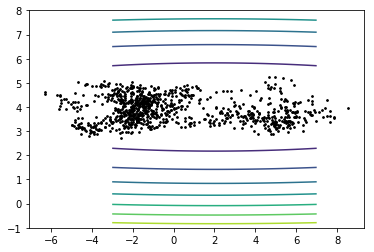

In [98]:

plot_contours()
for i, (sample, acc) in enumerate(chain[len(chain)//10:]):
    if acc and i%10==0:
#         print(sample)
#         print(x, y)
        x, y = sample[0][0][0], sample[0][1][0]
        plt.scatter(x, y, color='k', s=3)

# printing means
x_mean = np.mean([sample[0][0][0] for sample, acc in chain[len(chain)//10:] if acc])
y_mean = np.mean([sample[0][1][0] for sample, acc in chain[len(chain)//10:] if acc]) 
print('x_mean={}, y_mean={}'.format(x_mean, y_mean))

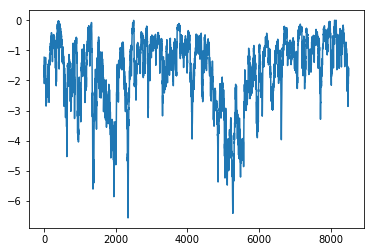

In [94]:
plt.plot(logp_array[3500:])